<a href="https://colab.research.google.com/github/qkrwoghd04/ImageCaptionnng_Using_ViT/blob/master/practice/CNN_Architecture_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN Architecture Practice

Distinguishing between a person **sleeping** and a person **falling down**



In [60]:
!pip install --upgrade keras # keras upgrade

In [61]:
# pip install split-folders

## Initialization

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import AdamW
from keras.preprocessing.image import load_img,img_to_array
import pathlib
from google.colab import drive
import os
from keras import datasets, layers, models
import tensorflow as tf

In [63]:
folder_path = r"/content/drive/MyDrive/image_dataset" # image_dataset > [Fall, Sleep] 폴더 존재
train_directory = r'/content/drive/MyDrive/image_dataset/processed'
test_directory = r'/content/drive/MyDrive/image_dataset_splited/test'

#hyperparameter
input_shape = (224,224,3)
batch_size = 16
epochs = 20
lr = 3e-6
weight_decay = 4e-5
image_size = 224
num_classes = 2

In [64]:
# import os
# import shutil

# # limit은 원하는 갯수만큼
# def rename_and_move_files(source_folder, target_folder, prefix, limit=20):
#     # 폴더 내의 파일 목록을 가져옵니다.
#     files = os.listdir(source_folder)
#     # 파일 이름 변경 및 이동을 위한 카운터
#     count = 0

#     for file_name in files:
#         # 지정된 개수만큼만 처리
#         if count < limit:
#             # 새 파일 이름 생성
#             new_name = f"{prefix}_{str(count+1).zfill(3)}.jpg"
#             # 원본 파일의 전체 경로
#             original_path = os.path.join(source_folder, file_name)
#             # 새 파일을 저장할 경로
#             new_path = os.path.join(target_folder, new_name)
#             # 파일 복사 (shutil.move를 사용하면 원본에서 삭제됨)
#             shutil.copy(original_path, new_path)
#             print(f"Copied and renamed {file_name} to {new_path}")
#             count += 1
#         else:
#             break



In [65]:
# # 원본 폴더 경로
# fall_source_folder = os.path.join(folder_path, 'Fall')
# sleep_source_folder = os.path.join(folder_path, 'Sleep')

# # 타겟 폴더 경로
# sleep_target_folder =  os.path.join(folder_path, 'processed2/Sleep')
# fall_target_folder =  os.path.join(folder_path, 'processed2/Fall')

# # 필요한 폴더가 없으면 생성
# os.makedirs(sleep_target_folder, exist_ok=True)
# os.makedirs(fall_target_folder, exist_ok=True)

# # 'Sleep' 폴더 내 파일 처리
# rename_and_move_files(sleep_source_folder, sleep_target_folder, 'Sleep', 400)

# # 'Fall' 폴더 내 파일 처리
# rename_and_move_files(fall_source_folder, fall_target_folder, 'Fall', 200)



In [66]:
# from google.colab import drive
# drive.mount('/content/drive')

In [67]:
# # 비디오 파일이 있는 폴더
# video_folder = r'/content/drive/MyDrive/dataset_action_split/train/Lying Down'
# # 이미지를 저장할 폴더
# output_folder = r'/content/drive/MyDrive/dataset_action_split/video_to_image'

# # 출력 폴더가 없으면 생성
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # 주어진 폴더에서 'video_xxx' 형식의 파일만 찾기
# for filename in os.listdir(video_folder):
#     if filename.startswith("video_") and filename.endswith(".avi"):  # 'video_xxx.mp4' 형식 확인
#         video_path = os.path.join(video_folder, filename)

#         # 비디오 파일 읽기
#         cap = cv2.VideoCapture(video_path)
#         if not cap.isOpened():
#             print(f"Error opening video file: {filename}")
#             continue

#         total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#         middle_frame = int(total_frames / 2)
#         cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

#         # 프레임 읽기
#         ret, frame = cap.read()
#         if ret:
#             # 이미지 파일로 저장
#             image_path = os.path.join(output_folder, filename.replace('.avi', '.jpg'))
#             cv2.imwrite(image_path, frame)
#             print(f"Image saved at {image_path}")
#         else:
#             print(f"Error: Can't read frame from {filename}")

#         cap.release()


In [68]:
categories = os.listdir(train_directory)
# Number of images for each disease
nums = {}
for lebal in categories:
    nums[lebal] = len(os.listdir(train_directory + '/' + lebal))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Sleep,200
Fall,200


In [69]:
# import splitfolders

# seed = 1337

# splitfolders.ratio(r'/content/drive/MyDrive/image_dataset/processed2' , output=r'/content/drive/MyDrive/image_dataset_splited2',seed=seed, ratio=(0.8,0.2))

### **이 매개변수들은 ImageDataGenerator를 사용할 때 이미지 데이터 증강(Image Data Augmentation)을 위해 설정하는 옵션입니다. 데이터 증강은 모델의 일반화 능력을 향상시키기 위해 실제 데이터셋에 없는 이미지 변형을 생성하는 기법입니다.**

1. **rescale=1./255**: 이미지의 각 픽셀 값을 0과 1 사이로 스케일링합니다. 일반적으로 이미지 픽셀 값은 0~255 사이의 값을 가지므로, 이를 255로 나누어 정규화합니다.

2. **rotation_range=10**: 이미지를 무작위로 최대 10도까지 회전시킵니다. 이는 이미지가 약간 기울어진 상태에서도 패턴을 인식할 수 있게 해줍니다.

3. **width_shift_range=0.2**: 이미지를 수평으로 최대 이미지 너비의 20%까지 무작위로 이동시킵니다. 이는 이미지의 위치가 다소 변해도 패턴을 인식할 수 있게 해줍니다.

4. **height_shift_range=0.2**: 이미지를 수직으로 최대 이미지 높이의 20%까지 무작위로 이동시킵니다. 수직 방향의 위치 변화에도 모델이 강인하게 만듭니다.

5. **shear_range=0.2**: 이미지를 시계 반대 방향으로 최대 20%까지 변형시킵니다(전단 변환). 이미지의 형태가 약간 비틀려져도 패턴을 인식할 수 있게 해줍니다.

6. **zoom_range=0.2**: 이미지를 80%에서 120% 사이의 크기로 무작위로 확대/축소합니다.

7. **horizontal_flip=True**: 이미지를 수평 방향으로 무작위로 뒤집습니다.

8. **fill_mode='nearest**': 이미지를 회전, 이동 또는 줌할 때 생기는 빈 공간을 채우는 방법입니다. 'nearest'는 빈 공간에 가장 가까운 픽셀 값을 사용하여 채우는 방식을 의미합니다.

In [70]:
# from keras.preprocessing.image import ImageDataGenerator

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    label_mode='binary'  # binary classification for cats and dogs
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    label_mode='binary'  # binary classification for cats and dogs
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    label_mode='binary'  # binary classification for cats and dogs
)


Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.
Found 40 files belonging to 2 classes.


### Keras Models API
[Keras](https://keras.io/api/models/model/)

> #### 간단한 **Squential모델**로 Stand와 Fall 분류의 정확도 파악하기

In [71]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# Dropout 추가
model.add(layers.Dropout(0.5)) # 보통 0.2 - 0.5로 정하고 과적합되기 쉬울수록 비율을 높게
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> #### **ResNet50** model로 Stand와 Fall 분류의 정확도 파악

In [72]:
# # Use ResNet50 as base model
# base_model = tf.keras.applications.ResNet50(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(image_size, image_size, 3)
# )
# # Freeze the layers of the base model
# base_model.trainable = False

# # Create a new model
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(384, activation='relu'),
#     Dense(2, activation='softmax')
# ])

In [73]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,132,033 (42.47 MB)

 Trainable params: 11,132,033 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Compile the model
model.compile(
    optimizer=AdamW(learning_rate=lr, weight_decay=weight_decay),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Compile the model
# model.compile(
#     optimizer=AdamW(lr=0.001, weight_decay= weight_decay),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [78]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.7551 - loss: 1.1189 - val_accuracy: 0.9000 - val_loss: 0.2472
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8121 - loss: 0.3828 - val_accuracy: 0.8750 - val_loss: 0.2976
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8471 - loss: 0.3196 - val_accuracy: 0.9250 - val_loss: 0.2404
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8731 - loss: 0.2921 - val_accuracy: 0.9250 - val_loss: 0.1903
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8467 - loss: 0.3297 - val_accuracy: 0.9000 - val_loss: 0.2238
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8598 - loss: 0.3061 - val_accuracy: 0.9125 - val_loss: 0.2777
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8185 - loss: 0.2907 - val_accuracy: 0.9500 - val_loss: 0.1971
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8659 - loss: 0.2393 - val_accuracy: 0.9125 - val_loss:

#### **간단한 sequential model result**
1. **adam(lr=0.0001), batch_size=128, epochs=10**<br>
1/1 - 2s - loss: 1.1067 - accuracy: 0.5000 - 2s/epoch - 2s/step<br>
Test accuracy: 0.5
2. **adam(lr=0.001), batch_size=128, epochs=10**<br>
1/1 - 2s - loss: 1.4303 - accuracy: 0.6250 - 2s/epoch - 2s/step<br>
Test accuracy: 0.625
3. **adam(lr=0.0001), batch_size=128, epochs=20**<br>
1/1 - 2s - loss: 3.0042 - accuracy: 0.6000 - 2s/epoch - 2s/step<br>
Test accuracy: 0.60
4. **adam(lr=0.001), batch_size=128, epochs=20**<br>
1/1 - 3s - loss: 2.3155 - accuracy: 0.4250 - 3s/epoch - 3s/step<br>
Test accuracy: 0.42
5. **adam(lr=0.001), batch_size=128, epochs=15**<br>
1/1 - 2s - loss: 1.4317 - accuracy: 0.5750 - 2s/epoch - 2s/step<br>
Test accuracy: 0.57
6. **adamW(lr=0.001, weight_decay = 0.004), batch_size=128, epochs=10**<br>
1/1 - 2s - loss: 0.5776 - accuracy: 0.8000 - 2s/epoch - 2s/step<br>
Test accuracy: 0.80

In [ ]:
# # Plot training history
# plt.figure(figsize=(8, 8))
# epochs_range = range(1)
# plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")
# plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
# plt.axis(ymin=0.4, ymax=1)
# plt.grid()
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['train', 'validation'])
# plt.show()

# Save the model
model.save("Fall_vs_Sleep_model.keras")

3/3 - 1s - 477ms/step - accuracy: 0.6250 - loss: 1.9649

Test accuracy: 0.625


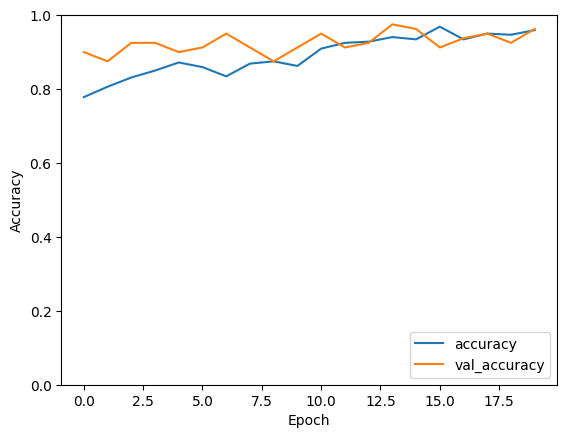

In [79]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


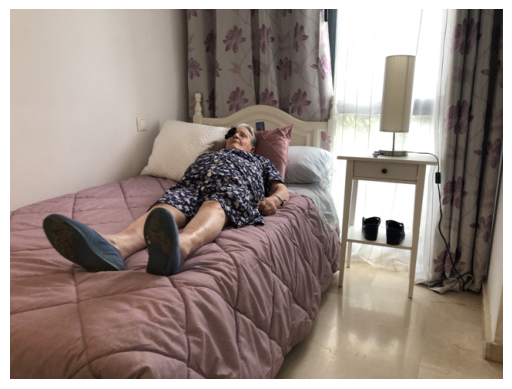

Predicted class: Sleep
Probability of being 'Fall': 28.80%
Probability of being 'Sleep': 71.20%


In [80]:
# 이미지 경로
image_path = "/content/drive/MyDrive/image_dataset_splited/test/Sleep/Sleep_004.jpg"

# 이미지 로드 및 전처리
img = load_img(image_path, target_size=(image_size, image_size))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가

# 모델을 통한 예측
predictions = model.predict(img_array)

# 클래스 이름
class_names = ["Fall", "Sleep"]

# "Fall"과 "Sleep" 클래스의 확률 출력
fall_probability = predictions[0][0]  # "Fall" 클래스에 대한 확률
sleep_probability = 1- fall_probability

# 예측된 클래스 인덱스 및 확률 추출
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[int(sleep_probability > 0.5)]

# 이미지 시각화
plt.imshow(load_img(image_path))
plt.axis('off')  # 축 표시 제거
plt.show()

# 예측 결과 및 확률 출력
print(f"Predicted class: {predicted_class}")
print(f"Probability of being 'Fall': {fall_probability * 100:.2f}%")
print(f"Probability of being 'Sleep': {sleep_probability * 100:.2f}%")
